In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import chain, product

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (8,4)

In [3]:
indices = '''5398
9958
5574
2702
9270
6242
5885
6367
7444
5851
8477
9686
6931
9697
6042
8964
8906
5313
6137
5754
9442
5557
9944
5675
8717
5816
5919
7315
8245
9863
8267
6187
5829
9855
6126
5345
6986
8997
6319
9515
9627
7200
6946
5235
5795
6940
6112
5488
7295
9571
5312
6203
6243
'''.split()

In [5]:
print(indices, sep=' ')

['5398', '9958', '5574', '2702', '9270', '6242', '5885', '6367', '7444', '5851', '8477', '9686', '6931', '9697', '6042', '8964', '8906', '5313', '6137', '5754', '9442', '5557', '9944', '5675', '8717', '5816', '5919', '7315', '8245', '9863', '8267', '6187', '5829', '9855', '6126', '5345', '6986', '8997', '6319', '9515', '9627', '7200', '6946', '5235', '5795', '6940', '6112', '5488', '7295', '9571', '5312', '6203', '6243']


In [4]:
indices = '''5398
9958
5574
2702
9270
6242
5885
6367
7444
5851
8477
9686
6931
9697
6042
8964
8906
5313
6137
5754
9442
5557
9944
5675
8717
5816
5919
7315
8245
9863
8267
6187
5829
9855
6126
5345
6986
8997
6319
9515
9627
7200
6946
5235
5795
6940
6112
5488
7295
9571
5312
6203
6243
'''.split()

indices = np.array(indices).astype(int)

In [5]:
def extract_hits(cxi_filename: str, indices: list, prefix='png', plot=True, **args) -> np.ndarray:
    """
    Plots all hits from cxi file using numpy
    """

    data = []

    f = h5py.File(cxi_filename, 'r')
    for idx in indices:
        current_nparray = np.array(f['entry_1/data_1/data'][idx])
        data.append(current_nparray)

        if plot:
            plt.imshow(current_nparray, **args)
            plt.savefig(f"{prefix}/{cxi_filename}_{idx}.png", dpi=300)
    

    return np.array(data)

In [84]:
def peaks(nparr):
    """Gives coordinates of values that are larger than all sidewise neighbours"""
    ret = np.zeros(nparr.shape).astype(np.int8)

    # shifts_lst = product([-1, 1], repeat=2)
    # shifts_lst = product([-2, -1, 0, 1, 2], repeat=2)
    # shifts_lst = product(range(-3, 3 + 1), repeat=2)
    #  shifts_lst = product(range(-4, 4 + 1), repeat=2)
    shifts_lst = product([-1, 0, 1], repeat=2)

    for roll_combination in shifts_lst:
        print(roll_combination)
        ret += (np.roll(nparr, roll_combination, axis=(0, 1)) < nparr).astype(np.int8)

    return ret, np.nonzero(ret)




In [157]:
%%time
hits = extract_hits('gpcr.cxi',indices, plot=False)

pks = peaks(hits)

CPU times: user 16.5 s, sys: 1.12 s, total: 17.6 s
Wall time: 4.12 s


In [163]:
ns, xs, ys = pks[1]
N=494994
ns, xs, ys = ns[N:N+100], xs[N:N+100], ys[N:N+100] 
answ = []

for n, x, y in product(ns, xs, ys):
    break

(0, 54, 248)
[[ 91  96  87]
 [ 95 100  80]
 [ 93  98  85]]


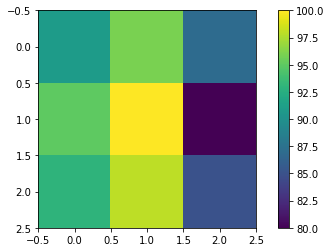

In [171]:
ns, xs, ys = pks[1]
N=4949
ns, xs, ys = ns[N:N+100], xs[N:N+100], ys[N:N+100] 
answ = []

for n, x, y in product(ns, xs, ys):
    break
    
print((n, x, y))
size=1
print(hits[n][x-size:x+size+1,y-size:y+size+1])

plt.imshow(hits[n][x-size:x+size+1,y-size:y+size+1]); plt.colorbar()


In [ ]:
print((x, y))
size=1
print(hits[0][x-size:x+size+1,y-size:y+size+1])

plt.imshow(hits[0][x-size:x+size+1,y-size:y+size+1]); plt.colorbar()

In [146]:
pks = peaks(hits[0])
xs, ys = pks[1]
N=5400
xs, ys = xs[N:N+100], ys[N:N+100] 
answ = []

x, y = xs[0], ys[0]

(-1, -1)
(-1, 0)
(-1, 1)
(0, -1)
(0, 0)
(0, 1)
(1, -1)
(1, 0)
(1, 1)


(58, 819)
[[124 122 114]
 [121 131 121]
 [120 125 130]]


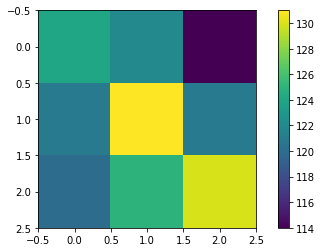

In [147]:
print((x, y))
size=1
print(hits[0][x-size:x+size+1,y-size:y+size+1])

plt.imshow(hits[0][x-size:x+size+1,y-size:y+size+1]); plt.colorbar()

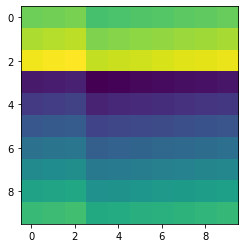

In [154]:
test = np.arange(10**2).reshape(10,10)
test = np.roll(test, (3,3), axis=(0,1))
plt.imshow(test)

def peaks(nparr):
    """Gives coordinates of values that are larger than all sidewise neighbours"""
    ret = np.zeros(nparr.shape).astype(np.int8)

    # shifts_lst = product([-1, 1], repeat=2)
    # shifts_lst = product([-2, -1, 0, 1, 2], repeat=2)
    # shifts_lst = product(range(-3, 3 + 1), repeat=2)
    #  shifts_lst = product(range(-4, 4 + 1), repeat=2)
    shifts_lst = product([-1, 0, 1], repeat=2)

    for roll_combination in shifts_lst:
        # print(roll_combination)
        ret += (np.roll(nparr, roll_combination, axis=(-2, -1)) < nparr).astype(np.int8)

    return (ret-7>0).astype(int), np.nonzero(ret-7>0)

In [155]:
peaks(test)

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), (array([2]), array([2])))

In [65]:
%run cxi2numpy.py

In [66]:
hits = extract_hits('gpcr.cxi', indices)

In [67]:
hits.shape

(53, 1440, 1440)

In [68]:
n, x, y = peaks_from_ndarray(hits)

In [69]:
profiles = peak_profiles(hits)

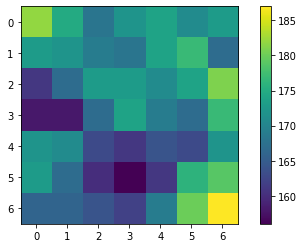

In [72]:
plt.imshow(profiles[4])
plt.colorbar();